# Evaluation of the metrics for image captioning

Scores range from 1 to 4, with a 1 indicating that the caption does not describe the image at all, a 2 indicating the caption describes minor aspects of the image but does not describe the image, a 3 indicating that the caption almost describes the image with minor mistakes, and a 4 indicating that the caption describes the image.

## Cohere

### Chebyshev

In [41]:
%pip install matplotlib scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 1.7 MB/s eta 0:00:26
   ---------------------------------------- 0.3/44.5 MB 2.8 MB/s eta 0:00:16
   ---------------------------------------- 0.5/44.5 MB 3.1 MB/s eta 0:00:15
    --------------------------------------- 0.7/44.5 MB 3.4 MB/s eta 0:00:13
    --------------------------------------- 0.8/44.5 MB 3.6 MB/s eta 0:00:13
   - -------------------------------------- 1.1/44.5 MB 4.0 MB/s eta 0:00:11
   - -------------------------------------- 1.4/44.5 MB 4.1 MB/s eta 0:00:11
   - -------------------------------------- 1.6/44.5 MB 4.2 MB/s eta 0:00:11
  


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
cohere_chebyshev = pd.read_csv("results/cohere_chebyshev_expert_distances.csv")
cohere_chebyshev.head()

,image,caption_id,avg_rating,avg_distance
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,0.016808
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.333333,0.032242
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.333333,0.021873
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1.666667,0.019209
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.333333,0.020976


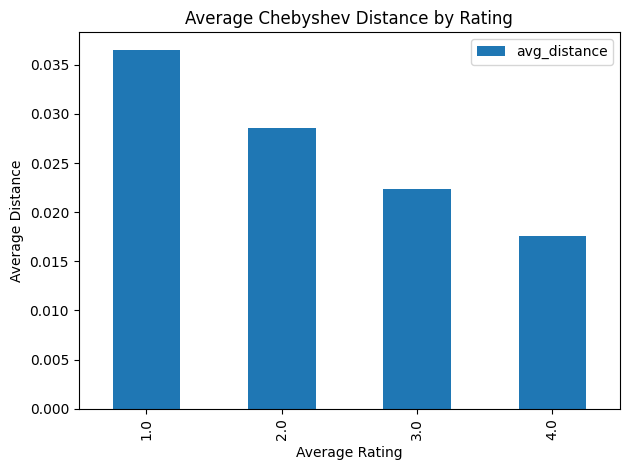

In [43]:
# Create a pivot table on cohere_chebyshev
pivot_table = cohere_chebyshev[cohere_chebyshev['avg_rating'].isin([1.0, 2.0, 3.0, 4.0])].pivot_table(
    values='avg_distance',
    index='avg_rating',
    aggfunc='mean'
)

pivot_table.plot(kind='bar')
plt.title('Average Chebyshev Distance by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Average Distance')
plt.tight_layout()
plt.show()


In [44]:
breakpoints = pivot_table['avg_distance'].tolist()
print(breakpoints)

def classify_distance(distance):
    if distance <= breakpoints[3]:
        return 4
    elif distance <= breakpoints[2]:
        return 3
    elif distance <= breakpoints[1]:
        return 2
    else:
        return 1

# Apply the classification function to the original dataframe
cohere_chebyshev['predicted_rating'] = cohere_chebyshev['avg_distance'].apply(classify_distance)
# Calculate the correlation between avg_rating and predicted_rating
correlation = cohere_chebyshev['avg_rating'].corr(cohere_chebyshev['predicted_rating'], method='kendall')
print(f"Correlation between avg_rating and predicted_rating: {correlation:.4f}")


[0.036487372981953765, 0.02858970524021945, 0.022363037234316985, 0.01756315285017002]
Correlation between avg_rating and predicted_rating: 0.1640


### Cosine

In [45]:
cohere_cosine = pd.read_csv("results/cohere_cosine_expert_distances.csv")
cohere_cosine.head()

,image,caption_id,avg_rating,avg_distance
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,0.295083
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.333333,0.400195
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.333333,0.306652
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1.666667,0.417062
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.333333,0.365979


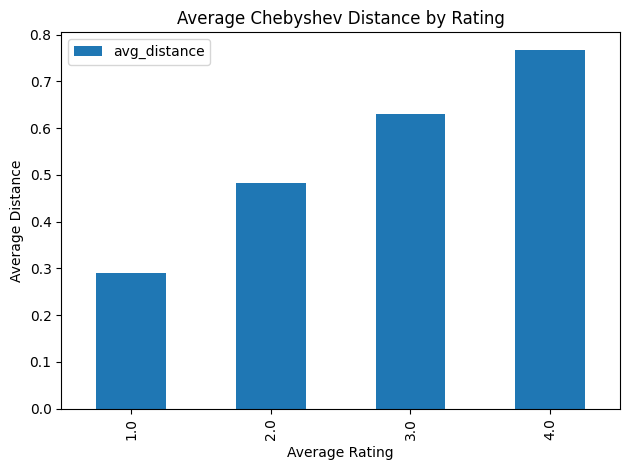

In [46]:
# Create a pivot table on cohere_chebyshev
pivot_table = cohere_cosine[cohere_cosine['avg_rating'].isin([1.0, 2.0, 3.0, 4.0])].pivot_table(
    values='avg_distance',
    index='avg_rating',
    aggfunc='mean'
)

pivot_table.plot(kind='bar')
plt.title('Average Chebyshev Distance by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Average Distance')
plt.tight_layout()
plt.show()

In [47]:
breakpoints = pivot_table['avg_distance'].tolist()
print(breakpoints)

[0.29022951004789704, 0.4826149085421314, 0.6312289063286757, 0.7668200684417915]


In [49]:
def classify_distance(distance):
    if distance <= breakpoints[0]:
        return 1
    elif distance <= breakpoints[1]:
        return 2
    elif distance <= breakpoints[2]:
        return 3
    else:
        return 4

# Apply the classification function to the original dataframe
cohere_cosine['predicted_rating'] = cohere_cosine['avg_distance'].apply(classify_distance)
# Calculate the correlation between avg_rating and predicted_rating
correlation = cohere_cosine['avg_rating'].corr(cohere_cosine['predicted_rating'], method='kendall')
print(f"Correlation between avg_rating and predicted_rating: {correlation:.4f}")

Correlation between avg_rating and predicted_rating: 0.6545


### Euclidian

In [50]:
cohere_euclidian = pd.read_csv("results/cohere_euclidian_expert_distances.csv")
cohere_euclidian.head()

,image,caption_id,avg_rating,avg_distance
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,1.185865
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.333333,1.094873
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.333333,1.177147
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1.666667,1.079037
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.333333,1.125599


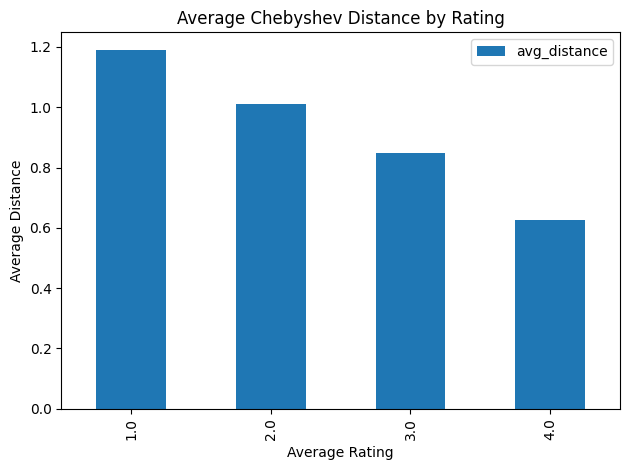

In [51]:
pivot_table = cohere_euclidian[cohere_euclidian['avg_rating'].isin([1.0, 2.0, 3.0, 4.0])].pivot_table(
    values='avg_distance',
    index='avg_rating',
    aggfunc='mean'
)

pivot_table.plot(kind='bar')
plt.title('Average Chebyshev Distance by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Average Distance')
plt.tight_layout()
plt.show()

In [52]:
breakpoints = pivot_table['avg_distance'].tolist()
print(breakpoints)

[1.1891139873724645, 1.0114935154089753, 0.8470395114912604, 0.6246978445918056]


In [53]:
def classify_distance(distance):
    if distance <= breakpoints[3]:
        return 4
    elif distance <= breakpoints[2]:
        return 3
    elif distance <= breakpoints[1]:
        return 2
    else:
        return 1
    
cohere_euclidian['predicted_rating'] = cohere_euclidian['avg_distance'].apply(classify_distance)

# Calculate the correlation between avg_rating and predicted_rating
correlation = cohere_euclidian['avg_rating'].corr(cohere_euclidian['predicted_rating'], method='kendall')
print(f"Correlation between avg_rating and predicted_rating: {correlation:.4f}")


Correlation between avg_rating and predicted_rating: 0.6397


### Minkowski

In [54]:
cohere_minkowski = pd.read_csv("results/cohere_minkowski_expert_distances.csv")
cohere_minkowski.head()

,image,caption_id,avg_rating,avg_distance
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.000000,1.185865
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.333333,1.094873
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.333333,1.177147
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1.666667,1.079037
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.333333,1.125599


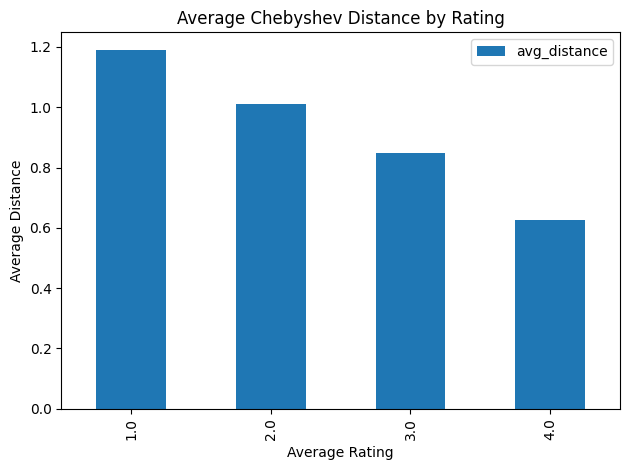

In [55]:
pivot_table = cohere_euclidian[cohere_euclidian['avg_rating'].isin([1.0, 2.0, 3.0, 4.0])].pivot_table(
    values='avg_distance',
    index='avg_rating',
    aggfunc='mean'
)

pivot_table.plot(kind='bar')
plt.title('Average Chebyshev Distance by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Average Distance')
plt.tight_layout()
plt.show()

In [56]:
breakpoints = pivot_table['avg_distance'].tolist()
print(breakpoints)

[1.1891139873724645, 1.0114935154089753, 0.8470395114912604, 0.6246978445918056]


In [57]:
def classify_distance(distance):
    if distance <= breakpoints[3]:
        return 4
    elif distance <= breakpoints[2]:
        return 3
    elif distance <= breakpoints[1]:
        return 2
    else:
        return 1
    
cohere_minkowski['predicted_rating'] = cohere_minkowski['avg_distance'].apply(classify_distance)

# Calculate the correlation between avg_rating and predicted_rating
correlation = cohere_minkowski['avg_rating'].corr(cohere_minkowski['predicted_rating'], method='kendall')
print(f"Correlation between avg_rating and predicted_rating: {correlation:.4f}")

Correlation between avg_rating and predicted_rating: 0.6397
